In [1]:
import json
import pandas as pd 
import numpy as np
import os
import re
from sklearn.metrics import mutual_info_score
from scipy.stats import entropy
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif', size=12)  # Adjust size for overall font

# Ensure all densities are normalized to sum to 1
def normalize_density(density):
    return density / np.sum(density)
# Mutual Information calculation
def kl_divergence(p_density, q_density):
    p_density = normalize_density(p_density)
    q_density = normalize_density(q_density)
    return entropy(p_density, q_density)

# Count the number of elements in a list
def count_elements(item):
    if isinstance(item, list):
        return len(item)
    else:
        return 1

In [2]:
GENERATION_MODEL_LIST = {
    "DeepSeek V3": {"model": "deepseek/deepseek-chat", 
                    "api_key": os.getenv("DEEPSEEK_API_KEY")},
    "QWEN 72B":{"model": "qwen/qwen-2.5-72b-instruct", 
                "api_key": os.getenv("QWEN_API_KEY")},
    "LLAMA 70B": {"model": "meta-llama/llama-3.3-70b-instruct",
                 "api_key": os.getenv("LLAMA_API_KEY")},
    "Claude 3.5 Haiku": {"model": "anthropic/claude-3.5-haiku", 
                        "api_key": os.getenv("CLAUDE_API_KEY")},
}

In [3]:
MODEL_NAME = "LLAMA 70B"

language_mapping = {
    'cantonese': 'Cantonese',
    'thai': 'Thai',
    'japanese': 'Japanese',
    'korean': 'Korean',
    'malay': 'Malay',
    'mandarin': 'Mandarin',
    'mono_eng': 'English',
    'urdu': 'Urdu',
}

real_language_mapping = {
    'HKG': 'Cantonese', 
    'THA': 'Thai', 
    'JPN': 'Japanese', 
    'KOR': 'Korean',
    'MYS': 'Malay',
    'CHN': 'Mandarin',
    'ENS': 'English',
    'PAK': 'Urdu'
}

real_path_mapping = {'SD_1_Classified_Unmerged_qn': "Quantifiers Numerals",
                'SD_1_Classified_Unmerged_na': "Numbers Agreement",
                'SD_1_Classified_Unmerged_rw': "Reference Word",
                'SD_1_Classified_Unmerged_ta': "Tense Agreement",
                'SD_1_Classified_Unmerged_mve': "Modal Verbs Expressions",
                'SD_1_Classified_Unmerged_sva': "Subject Verb Agreement",
                'SD_1_Classified_Unmerged_sa': "Speech Acts",
                'SD_1_Classified_Unmerged_nvc': "Noun Verb Collocation"
                }

path_mapping = {f'{MODEL_NAME}_generation_quantifiers_numerals': "Quantifiers Numerals",
                f'{MODEL_NAME}_generation_tense_agreement': "Tense Agreement",
                f'{MODEL_NAME}_generation_reference_word': "Reference Word",
                f'{MODEL_NAME}_generation_numbers_agreement': "Numbers Agreement",
                f'{MODEL_NAME}_generation_speech_acts': "Speech Acts",
                f'{MODEL_NAME}_generation_subject_verb_agreement': "Subject Verb Agreement",
                f'{MODEL_NAME}_generation_modal_verbs_expressions': "Modal Verbs Expressions",
                f'{MODEL_NAME}_generation_noun_verb_collocation': "Noun Verb Collocation"
                }

revert_mapping = {v: k for k, v in path_mapping.items()}
revert_real_mapping = {v: k for k, v in real_path_mapping.items()}

revert_lan_mapping = {v: k for k, v in language_mapping.items()}
revert_lan_real_mapping = {v: k for k, v in real_language_mapping.items()}

total_language_list = list(real_language_mapping.values())
real_language_list = list(real_language_mapping.keys())
total_feature_list = list(path_mapping.values())

In [5]:
# Put data under /data/{MODEL_NAME}_output
path = f'../data/{MODEL_NAME}_output'
for root, folders, files in os.walk(path):
    folder_list = folders
    break

# Put real data under /data/ICNALE_annotations
real_path = '../data/ICNALE_annotations'
for root, folders, files in os.walk(real_path):
    real_folder_list = folders
    break

if not os.path.exists(f"../result/{MODEL_NAME}_output"):
    os.makedirs(f"../result/{MODEL_NAME}_output")

Topic: Quantifiers Numerals with L2: Cantonese
LLM L2 Cantonese Gap: 0.14497470573586485
LLM Mono ENG Gap: 0.7247848545105
LLM Real ENG Gap: 0.013070539433935666
**************************************************


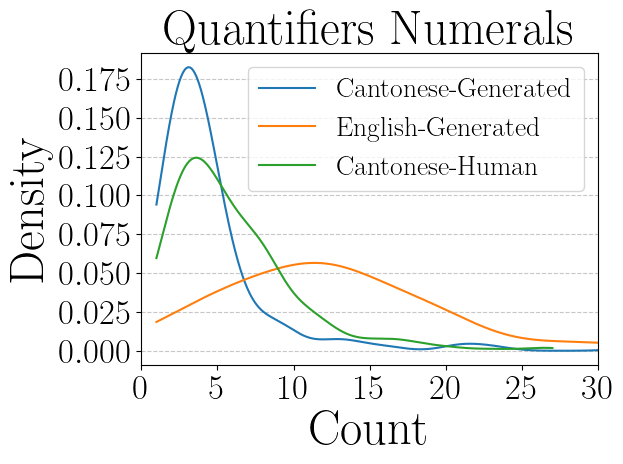

Topic: Quantifiers Numerals with L2: Thai
LLM L2 Thai Gap: 0.049861418248560364
LLM Mono ENG Gap: 9.226827522442038
LLM Real ENG Gap: 0.7125349500131772
**************************************************


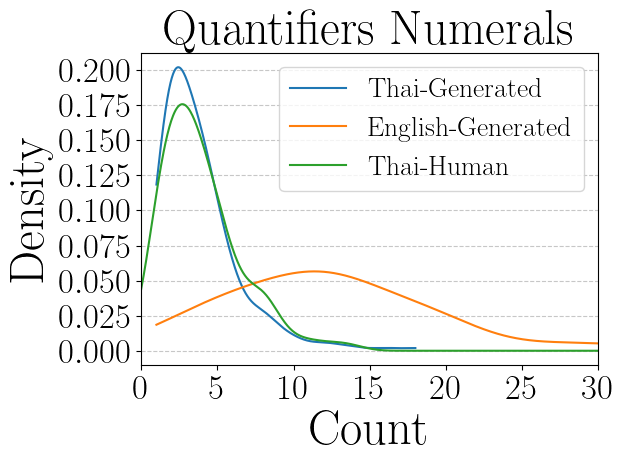

Topic: Quantifiers Numerals with L2: Japanese
LLM L2 Japanese Gap: 0.04449304480117997
LLM Mono ENG Gap: 1.954942215388575
LLM Real ENG Gap: 0.26720001104067165
**************************************************


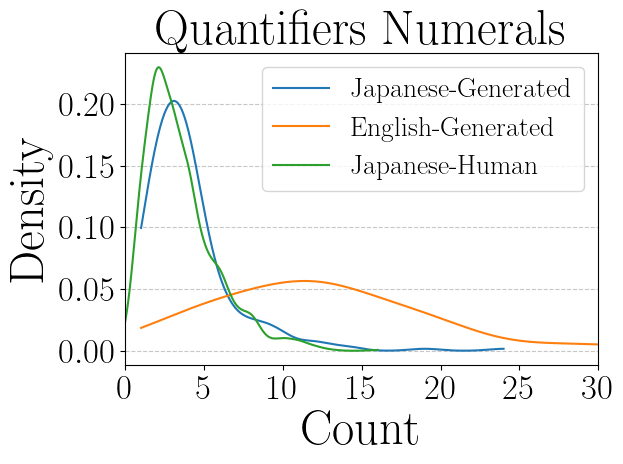

Topic: Quantifiers Numerals with L2: Korean
LLM L2 Korean Gap: 0.03310274096087689
LLM Mono ENG Gap: 0.6543256910659426
LLM Real ENG Gap: 0.11324339174885159
**************************************************


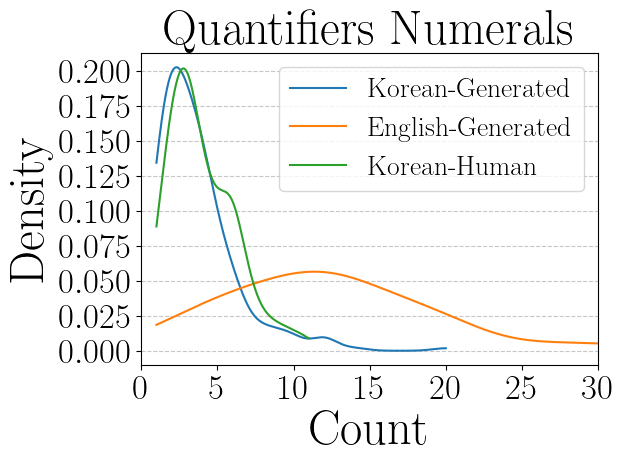

Topic: Quantifiers Numerals with L2: Malay
LLM L2 Malay Gap: 0.006852119978909433
LLM Mono ENG Gap: 1.0390558086054753
LLM Real ENG Gap: 0.11580561043233992
**************************************************


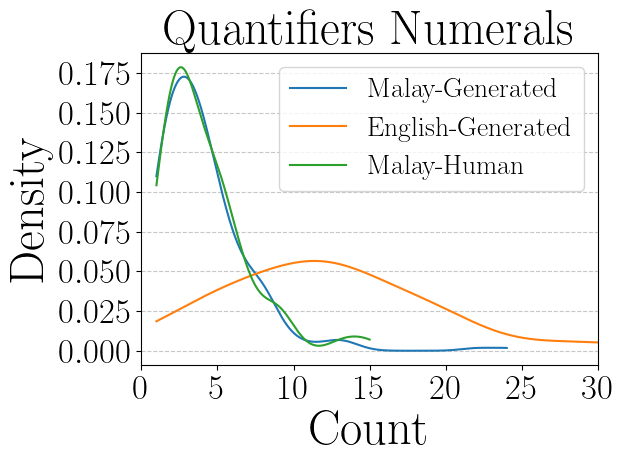

Topic: Quantifiers Numerals with L2: Mandarin
LLM L2 Mandarin Gap: 0.027260405640483158
LLM Mono ENG Gap: 1.3816071172405104
LLM Real ENG Gap: 0.058413808348957943
**************************************************


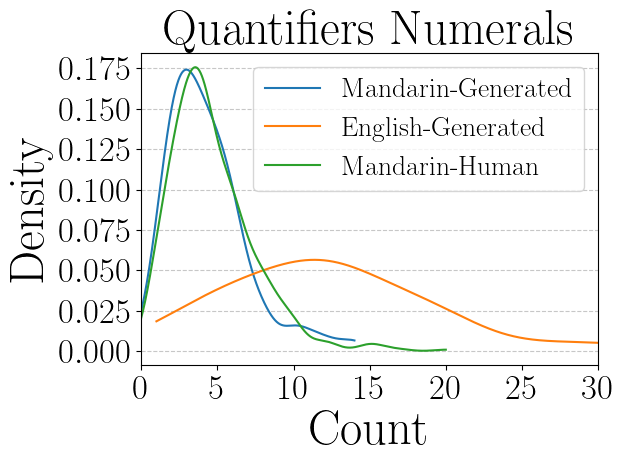

Topic: Quantifiers Numerals with L2: English
LLM L2 English Gap: 0.9839358912805425
LLM Mono ENG Gap: 0.9839358912805425
LLM Real ENG Gap: 0.0
**************************************************


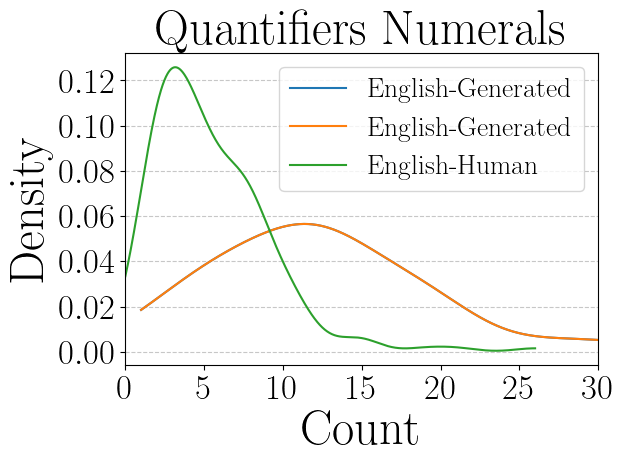

Topic: Quantifiers Numerals with L2: Urdu
LLM L2 Urdu Gap: 0.07941444823507754
LLM Mono ENG Gap: 0.918338785848497
LLM Real ENG Gap: 0.058951565376854316
**************************************************


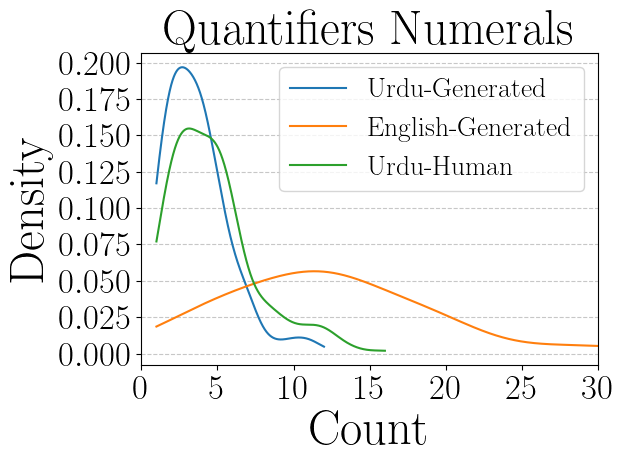

Topic: Tense Agreement with L2: Cantonese
LLM L2 Cantonese Gap: 0.2758299079197154
LLM Mono ENG Gap: 0.0267171480995817
LLM Real ENG Gap: 0.06494951484539176
**************************************************


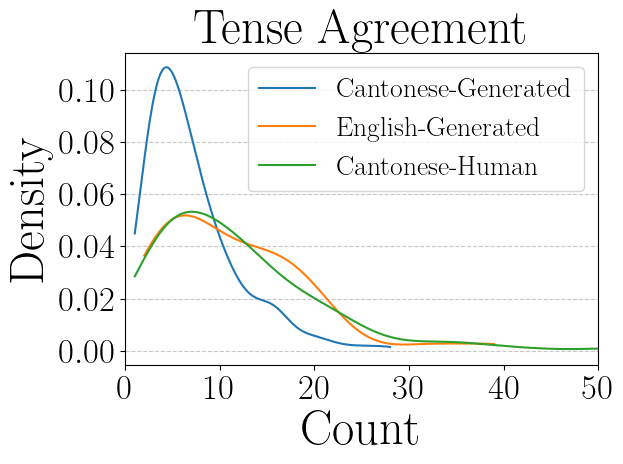

Topic: Tense Agreement with L2: Thai
LLM L2 Thai Gap: 0.012650745625820086
LLM Mono ENG Gap: 0.5700844763128268
LLM Real ENG Gap: 0.1309828726216458
**************************************************


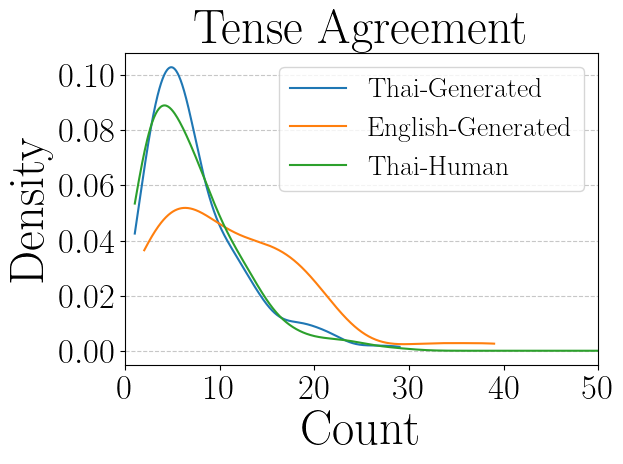

Topic: Tense Agreement with L2: Japanese
LLM L2 Japanese Gap: 0.08198064968509998
LLM Mono ENG Gap: 0.5139483692099112
LLM Real ENG Gap: 0.25159059523724925
**************************************************


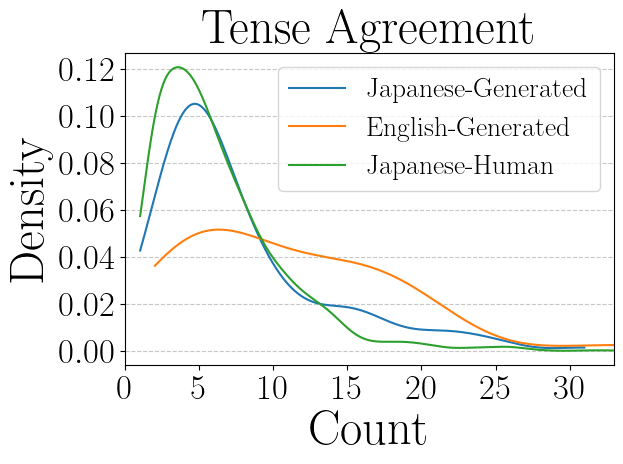

Topic: Tense Agreement with L2: Korean
LLM L2 Korean Gap: 0.019542368759151975
LLM Mono ENG Gap: 0.29586951437061093
LLM Real ENG Gap: 0.09087549795504961
**************************************************


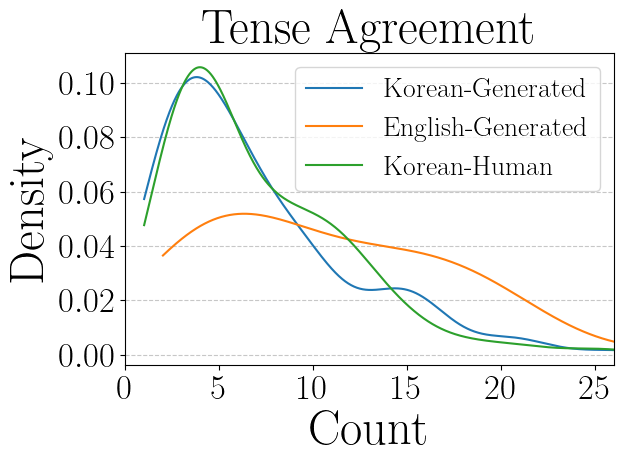

Topic: Tense Agreement with L2: Malay
LLM L2 Malay Gap: 0.035912218128526414
LLM Mono ENG Gap: 0.32091668764067305
LLM Real ENG Gap: 0.1880428897947539
**************************************************


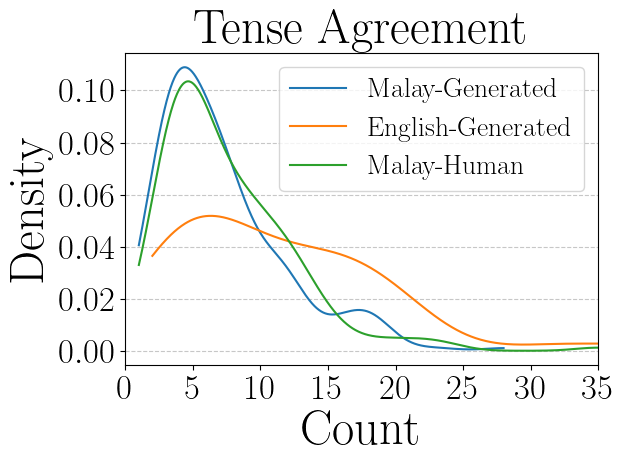

Topic: Tense Agreement with L2: Mandarin
LLM L2 Mandarin Gap: 0.038428314304029605
LLM Mono ENG Gap: 0.27738163110257846
LLM Real ENG Gap: 0.12434227747657284
**************************************************


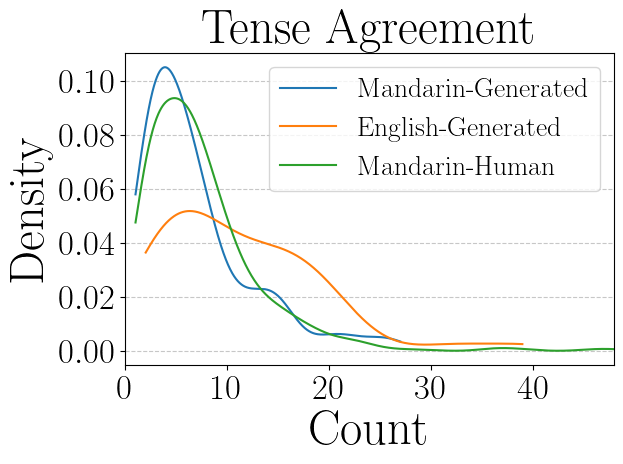

Topic: Tense Agreement with L2: English
LLM L2 English Gap: 0.06514704252023555
LLM Mono ENG Gap: 0.06514704252023555
LLM Real ENG Gap: 0.0
**************************************************


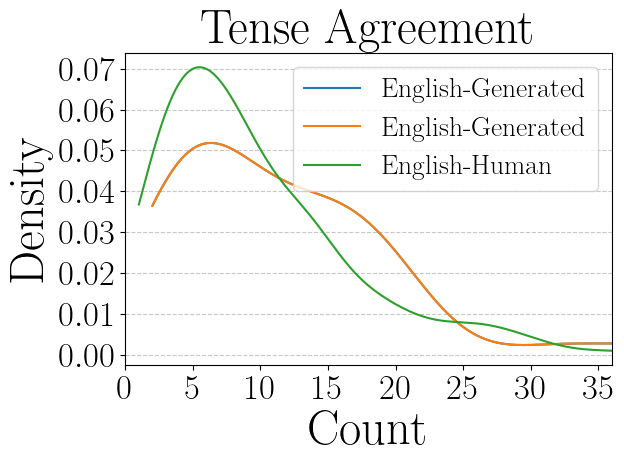

Topic: Tense Agreement with L2: Urdu
LLM L2 Urdu Gap: 0.07332871062850829
LLM Mono ENG Gap: 0.14541890383628764
LLM Real ENG Gap: 0.045090163690972726
**************************************************


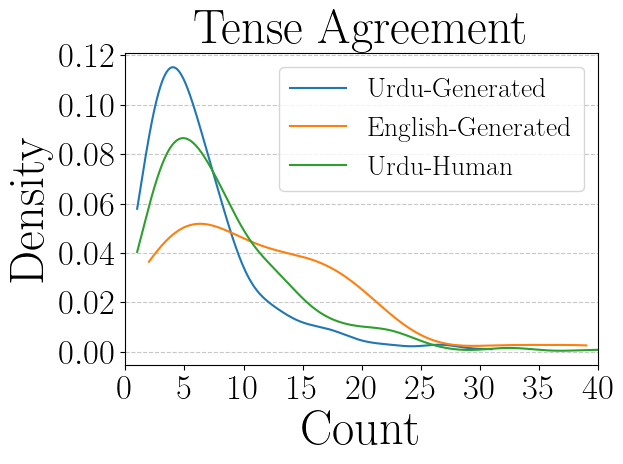

Topic: Reference Word with L2: Cantonese
LLM L2 Cantonese Gap: 0.10963696138629075
LLM Mono ENG Gap: 0.1875287896746144
LLM Real ENG Gap: 0.07537993236017423
**************************************************


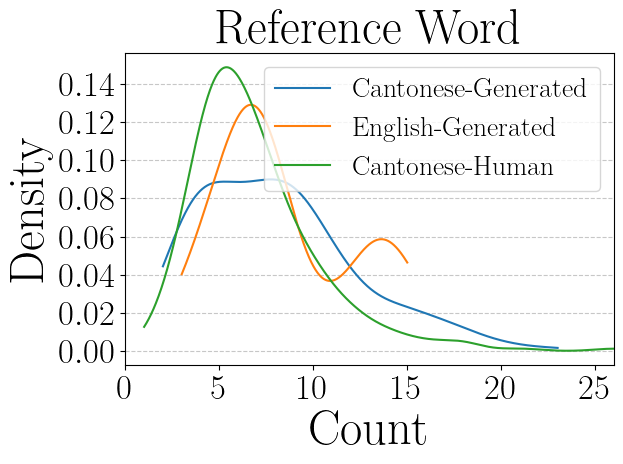

Topic: Reference Word with L2: Thai
LLM L2 Thai Gap: 0.09705212153295048
LLM Mono ENG Gap: 0.222266854631511
LLM Real ENG Gap: 0.0858666877852001
**************************************************


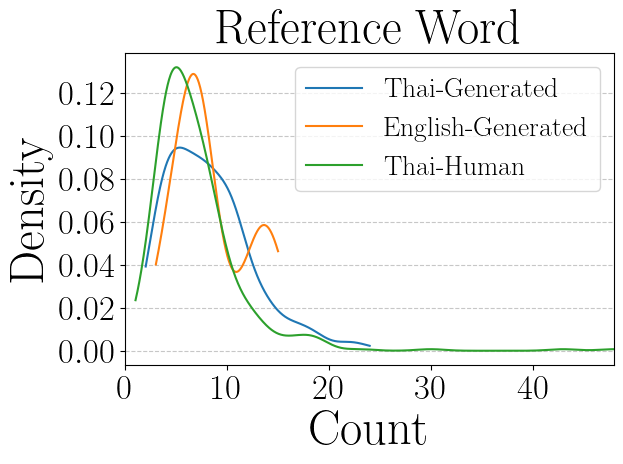

Topic: Reference Word with L2: Japanese
LLM L2 Japanese Gap: 0.2648819672587289
LLM Mono ENG Gap: 0.27301281576542313
LLM Real ENG Gap: 0.2065750225533777
**************************************************


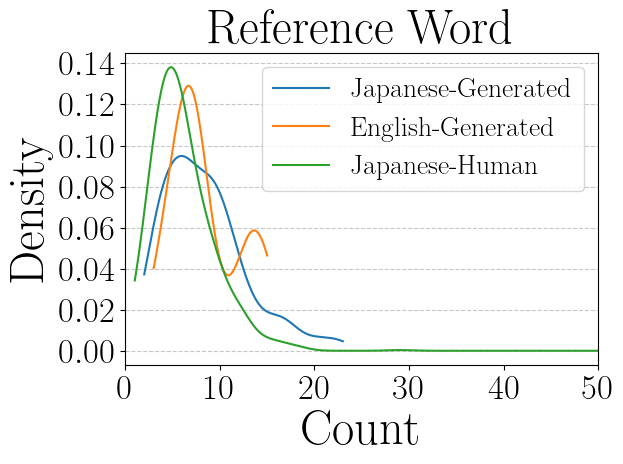

Topic: Reference Word with L2: Korean
LLM L2 Korean Gap: 0.009511511333037008
LLM Mono ENG Gap: 0.10827125237615494
LLM Real ENG Gap: 0.007388793598982084
**************************************************


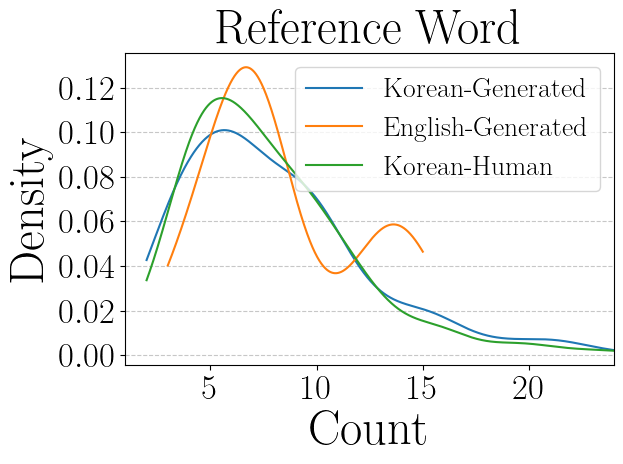

Topic: Reference Word with L2: Malay
LLM L2 Malay Gap: 0.026918266653102
LLM Mono ENG Gap: 0.10907668733381568
LLM Real ENG Gap: 0.008973688628028165
**************************************************


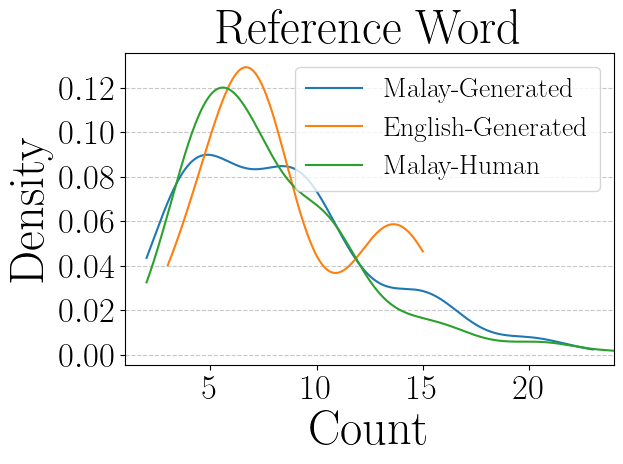

Topic: Reference Word with L2: Mandarin
LLM L2 Mandarin Gap: 0.06574331957765953
LLM Mono ENG Gap: 0.09989202890411819
LLM Real ENG Gap: 0.04847358365148195
**************************************************


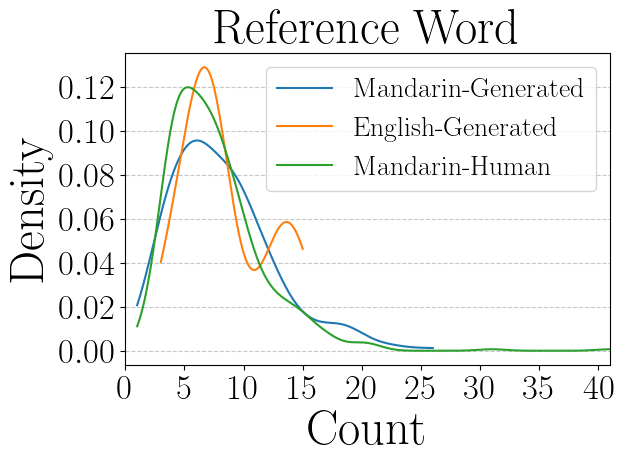

Topic: Reference Word with L2: English
LLM L2 English Gap: 0.10937645129967041
LLM Mono ENG Gap: 0.10937645129967041
LLM Real ENG Gap: 0.0
**************************************************


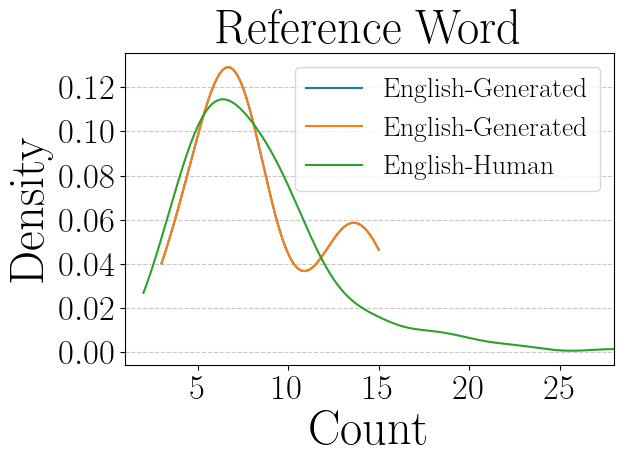

Topic: Reference Word with L2: Urdu
LLM L2 Urdu Gap: 0.062410441135683586
LLM Mono ENG Gap: 0.19285996319194995
LLM Real ENG Gap: 0.0783128287012099
**************************************************


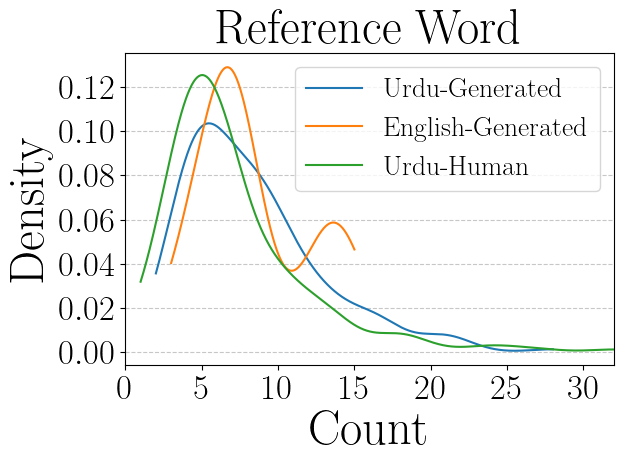

Topic: Numbers Agreement with L2: Cantonese
LLM L2 Cantonese Gap: 0.09988248797679448
LLM Mono ENG Gap: 0.4888839919310601
LLM Real ENG Gap: 0.16619849259736594
**************************************************


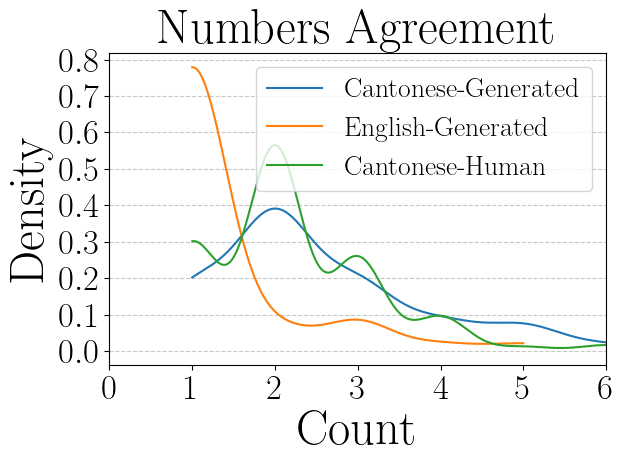

Topic: Numbers Agreement with L2: Thai
LLM L2 Thai Gap: 0.130104330290731
LLM Mono ENG Gap: 0.26477605847899344
LLM Real ENG Gap: 0.06659054043898878
**************************************************


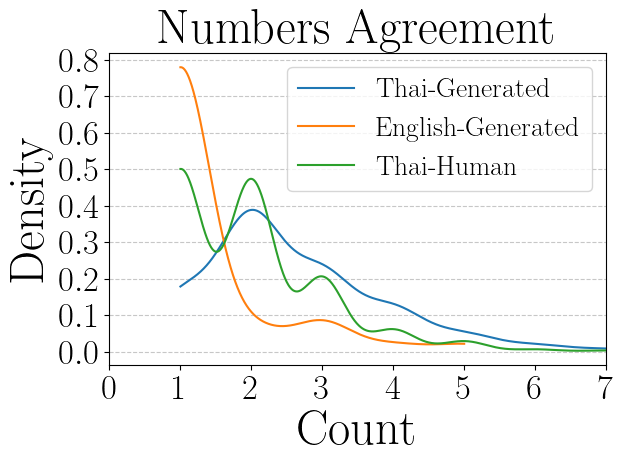

Topic: Numbers Agreement with L2: Japanese
LLM L2 Japanese Gap: 0.1900759138702099
LLM Mono ENG Gap: 0.3308046501560899
LLM Real ENG Gap: 0.07648053101856381
**************************************************


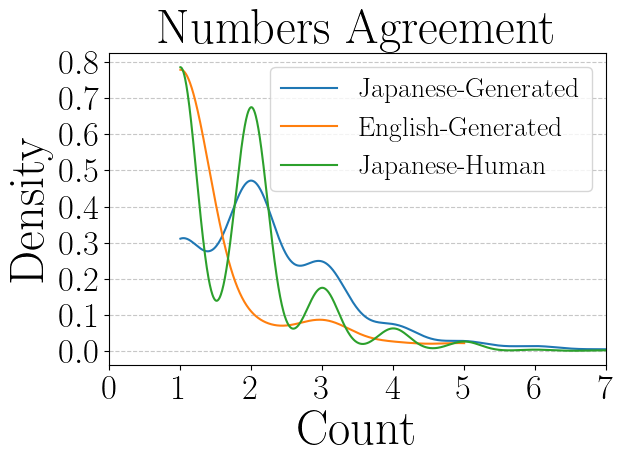

Topic: Numbers Agreement with L2: Korean
LLM L2 Korean Gap: 0.05094943292529292
LLM Mono ENG Gap: 0.25856977885887267
LLM Real ENG Gap: 0.06708101697864033
**************************************************


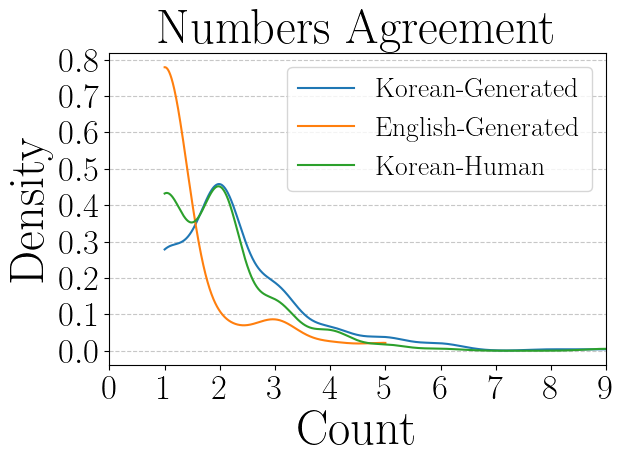

Topic: Numbers Agreement with L2: Malay
LLM L2 Malay Gap: 0.09202387153842397
LLM Mono ENG Gap: 0.3410933183707381
LLM Real ENG Gap: 0.10218058452964263
**************************************************


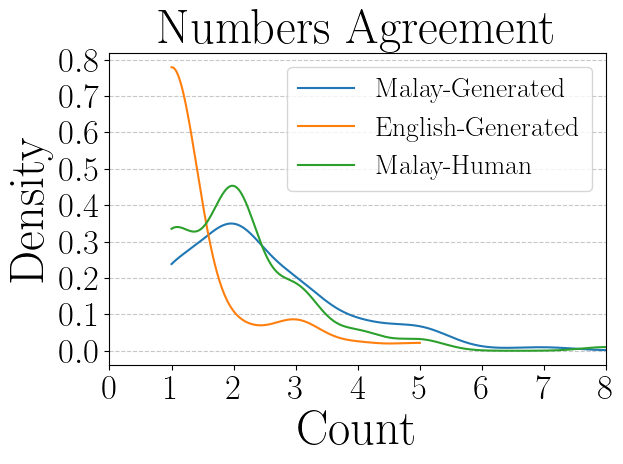

Topic: Numbers Agreement with L2: Mandarin
LLM L2 Mandarin Gap: 0.03752002634498511
LLM Mono ENG Gap: 0.3747916299868758
LLM Real ENG Gap: 0.10276502893067099
**************************************************


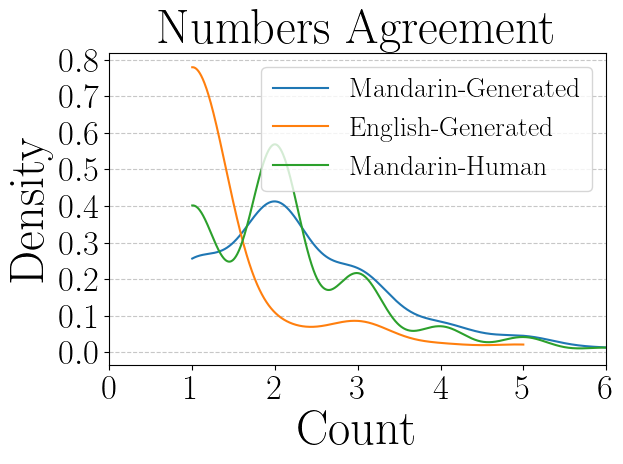

Topic: Numbers Agreement with L2: English
LLM L2 English Gap: 0.18643364810008756
LLM Mono ENG Gap: 0.18643364810008756
LLM Real ENG Gap: 0.0
**************************************************


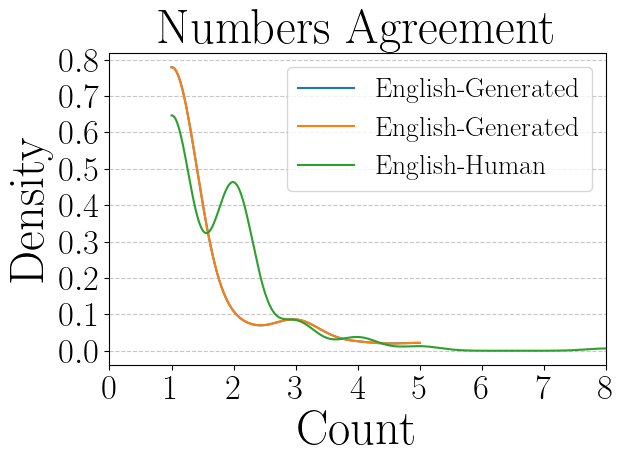

Topic: Numbers Agreement with L2: Urdu
LLM L2 Urdu Gap: 0.049845317080664336
LLM Mono ENG Gap: 0.2815679122008469
LLM Real ENG Gap: 0.06767922103563574
**************************************************


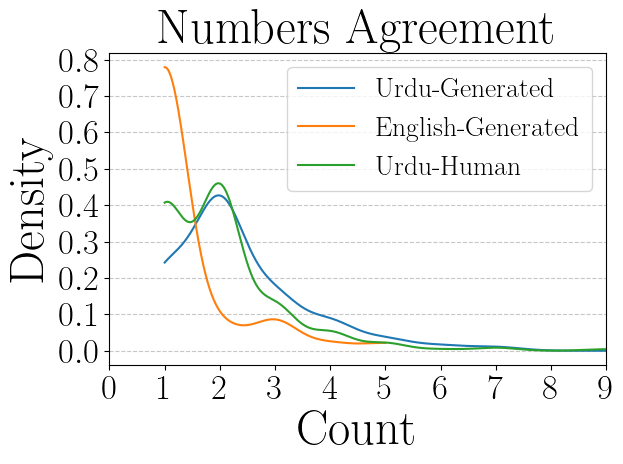

Topic: Speech Acts with L2: Cantonese
LLM L2 Cantonese Gap: 0.14512120012343643
LLM Mono ENG Gap: 0.20267602101255497
LLM Real ENG Gap: 0.05859083635531192
**************************************************


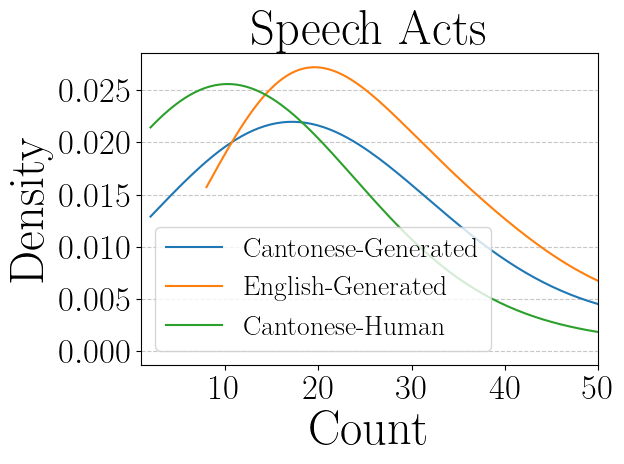

Topic: Speech Acts with L2: Thai
LLM L2 Thai Gap: 0.1877138067599079
LLM Mono ENG Gap: 0.39855316957575593
LLM Real ENG Gap: 0.014056082477902649
**************************************************


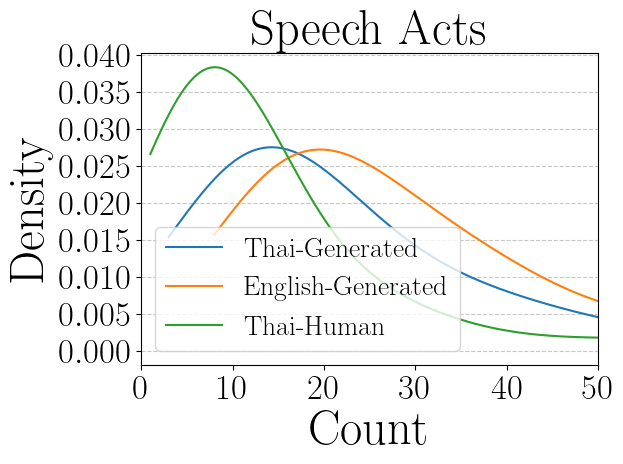

Topic: Speech Acts with L2: Japanese
LLM L2 Japanese Gap: 0.21173518962318633
LLM Mono ENG Gap: 0.519571403470106
LLM Real ENG Gap: 0.06814639718919879
**************************************************


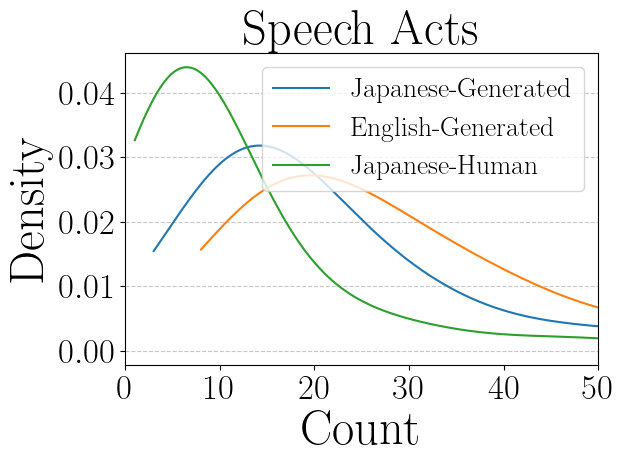

Topic: Speech Acts with L2: Korean
LLM L2 Korean Gap: 0.10866138031287795
LLM Mono ENG Gap: 0.24679345996900193
LLM Real ENG Gap: 0.050158579060556825
**************************************************


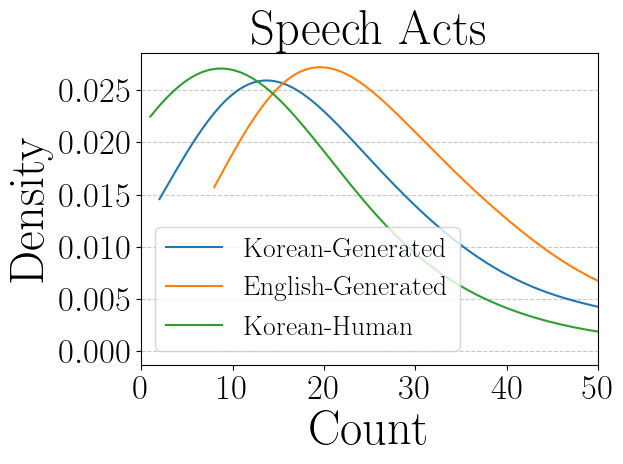

Topic: Speech Acts with L2: Malay
LLM L2 Malay Gap: 0.0764869646598802
LLM Mono ENG Gap: 0.2788073720296116
LLM Real ENG Gap: 0.046937829780124715
**************************************************


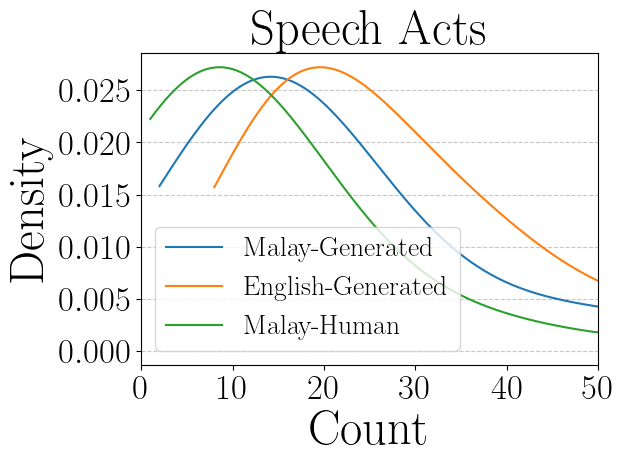

Topic: Speech Acts with L2: Mandarin
LLM L2 Mandarin Gap: 0.1611938566556642
LLM Mono ENG Gap: 0.31861142749280563
LLM Real ENG Gap: 0.036117850231609204
**************************************************


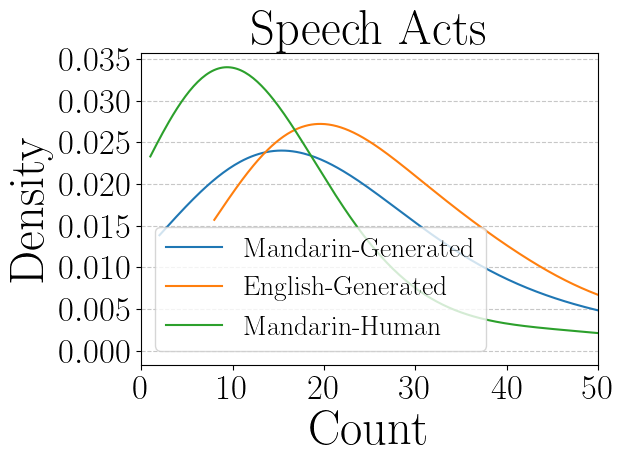

Topic: Speech Acts with L2: English
LLM L2 English Gap: 0.3236013089461325
LLM Mono ENG Gap: 0.3236013089461325
LLM Real ENG Gap: 0.0
**************************************************


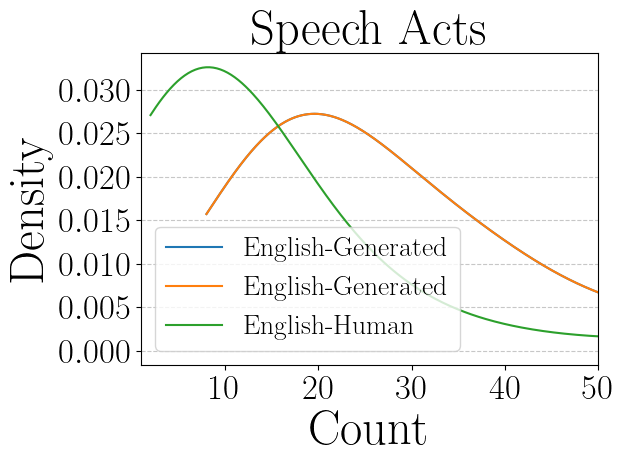

Topic: Speech Acts with L2: Urdu
LLM L2 Urdu Gap: 0.04305866679689932
LLM Mono ENG Gap: 0.15751923470815957
LLM Real ENG Gap: 0.13811322939980475
**************************************************


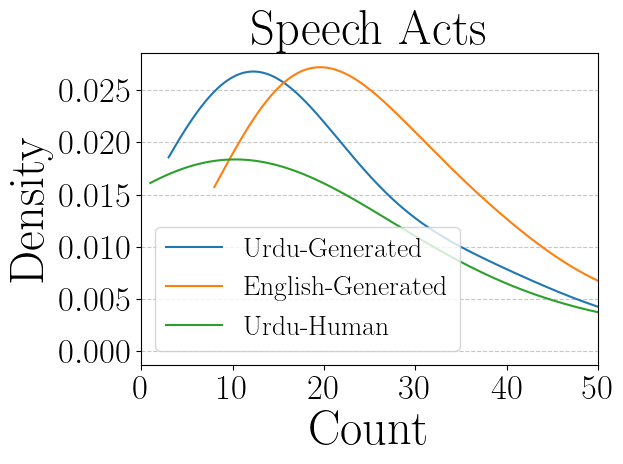

Topic: Subject Verb Agreement with L2: Cantonese
LLM L2 Cantonese Gap: 0.07340003515754373
LLM Mono ENG Gap: 0.31832313396830547
LLM Real ENG Gap: 0.037360533492505364
**************************************************


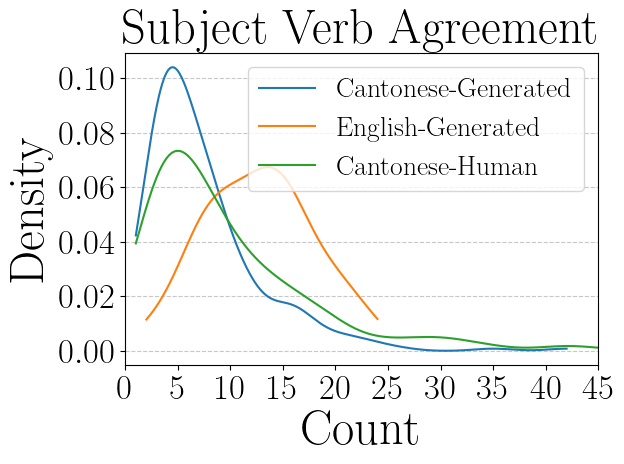

Topic: Subject Verb Agreement with L2: Thai
LLM L2 Thai Gap: 0.05984506637783218
LLM Mono ENG Gap: 0.9131713674601161
LLM Real ENG Gap: 0.4461995274916732
**************************************************


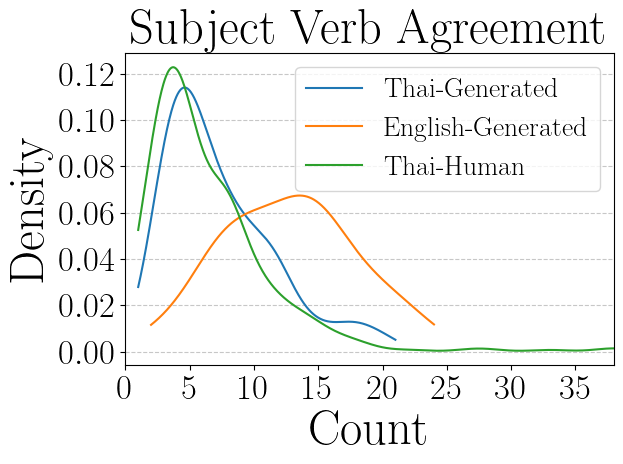

Topic: Subject Verb Agreement with L2: Japanese
LLM L2 Japanese Gap: 0.0872317481066957
LLM Mono ENG Gap: 0.8740499568446841
LLM Real ENG Gap: 1.056606104539021
**************************************************


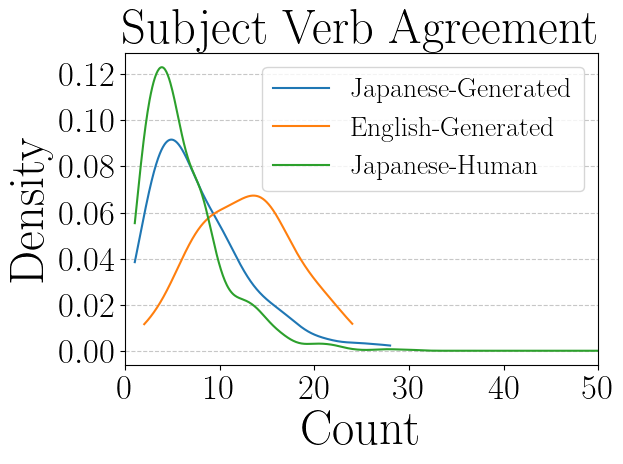

Topic: Subject Verb Agreement with L2: Korean
LLM L2 Korean Gap: 0.14823038286187992
LLM Mono ENG Gap: 0.6046121808595597
LLM Real ENG Gap: 1.0226052945488253
**************************************************


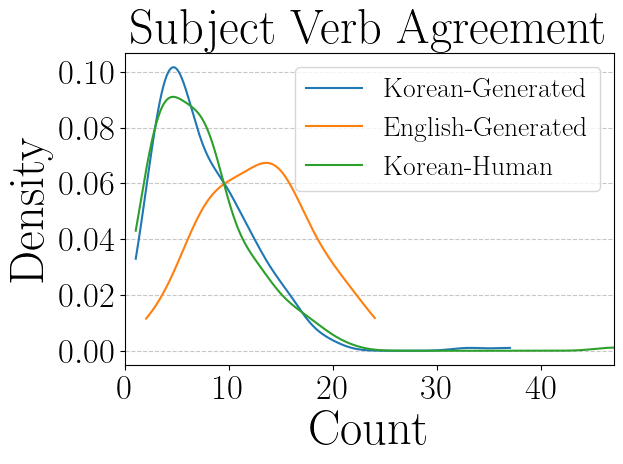

Topic: Subject Verb Agreement with L2: Malay
LLM L2 Malay Gap: 0.026431484177374183
LLM Mono ENG Gap: 0.47625702583702
LLM Real ENG Gap: 0.126790236684162
**************************************************


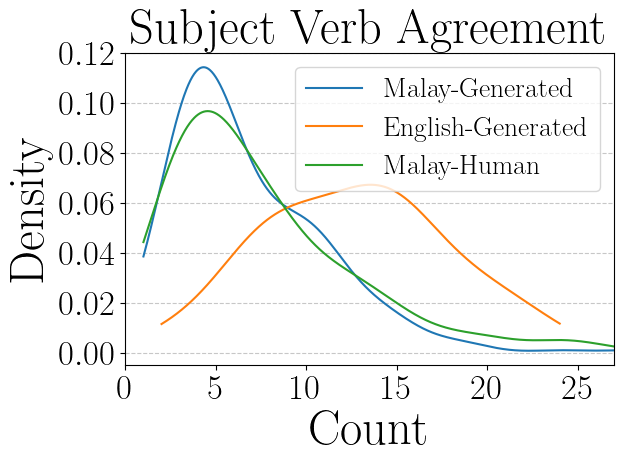

Topic: Subject Verb Agreement with L2: Mandarin
LLM L2 Mandarin Gap: 0.02325280620185187
LLM Mono ENG Gap: 0.7414075883312736
LLM Real ENG Gap: 0.357757813900486
**************************************************


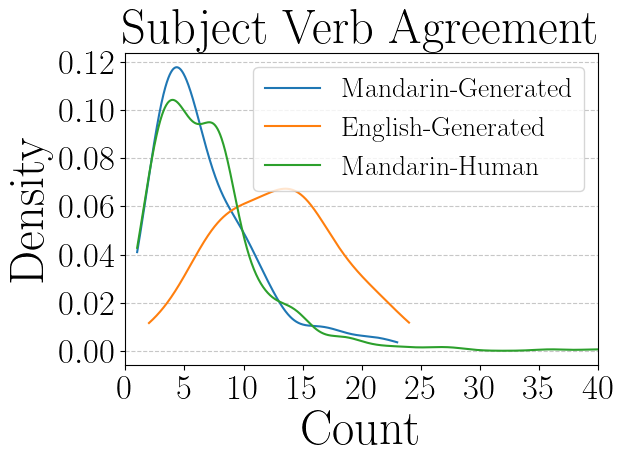

Topic: Subject Verb Agreement with L2: English
LLM L2 English Gap: 0.18791613879084926
LLM Mono ENG Gap: 0.18791613879084926
LLM Real ENG Gap: 0.0
**************************************************


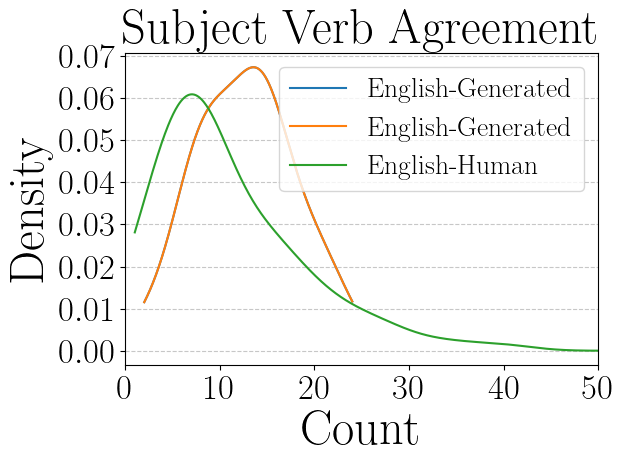

Topic: Subject Verb Agreement with L2: Urdu
LLM L2 Urdu Gap: 0.04614899714296104
LLM Mono ENG Gap: 0.3860360522640958
LLM Real ENG Gap: 0.12977626155068672
**************************************************


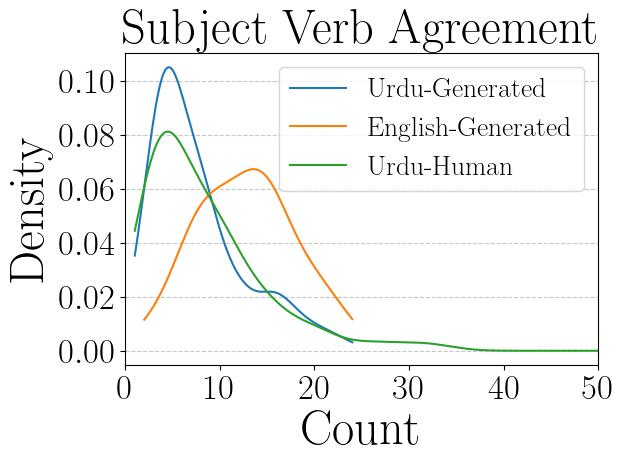

Topic: Modal Verbs Expressions with L2: Cantonese
LLM L2 Cantonese Gap: 0.05234632328268836
LLM Mono ENG Gap: 0.12329496009238672
LLM Real ENG Gap: 0.004879505454535998
**************************************************


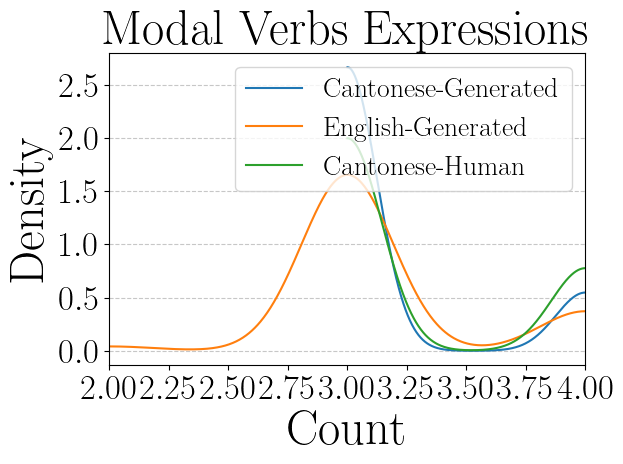

Topic: Modal Verbs Expressions with L2: Thai
LLM L2 Thai Gap: 0.11976246949833369
LLM Mono ENG Gap: 0.179362805770202
LLM Real ENG Gap: 0.020419617700978727
**************************************************


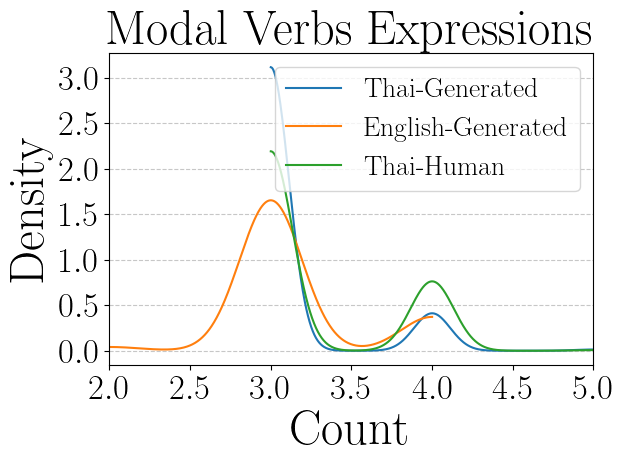

Topic: Modal Verbs Expressions with L2: Japanese
LLM L2 Japanese Gap: 0.05293428525194875
LLM Mono ENG Gap: 0.4524645111182968
LLM Real ENG Gap: 0.13056683201992114
**************************************************


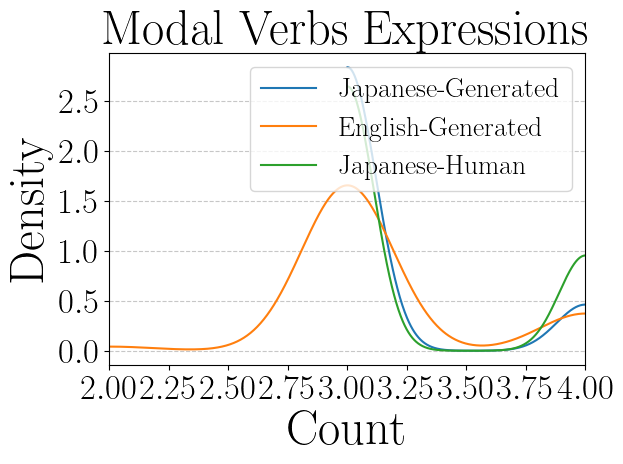

Topic: Modal Verbs Expressions with L2: Korean
LLM L2 Korean Gap: 0.13143128990337002
LLM Mono ENG Gap: 0.06904957674718337
LLM Real ENG Gap: 0.005304758773920554
**************************************************


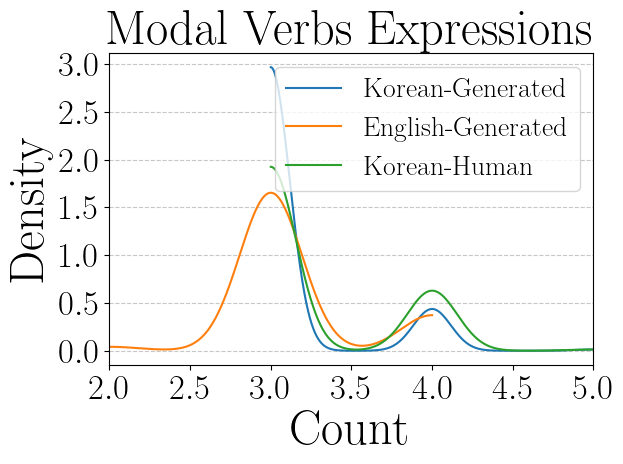

Topic: Modal Verbs Expressions with L2: Malay
LLM L2 Malay Gap: 0.06514400665960485
LLM Mono ENG Gap: 0.09747031363256528
LLM Real ENG Gap: 0.00754956266194555
**************************************************


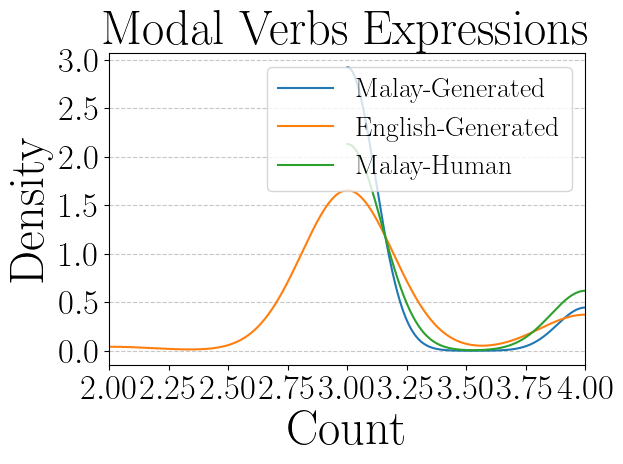

Topic: Modal Verbs Expressions with L2: Mandarin
LLM L2 Mandarin Gap: 0.08225555664181489
LLM Mono ENG Gap: 0.2123014914502824
LLM Real ENG Gap: 0.02818994577852097
**************************************************


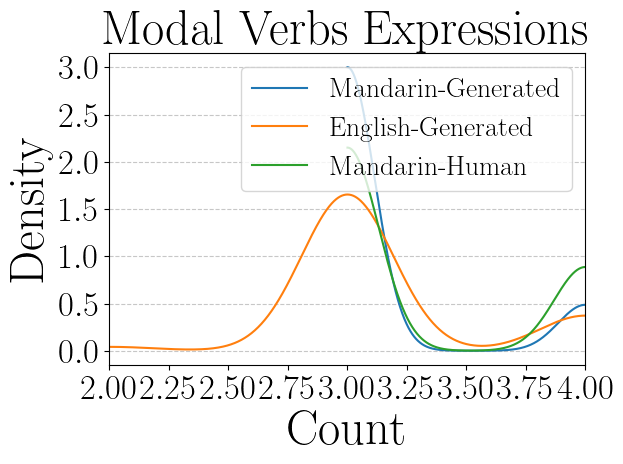

Topic: Modal Verbs Expressions with L2: English
LLM L2 English Gap: 0.07485297069710399
LLM Mono ENG Gap: 0.07485297069710399
LLM Real ENG Gap: 0.0
**************************************************


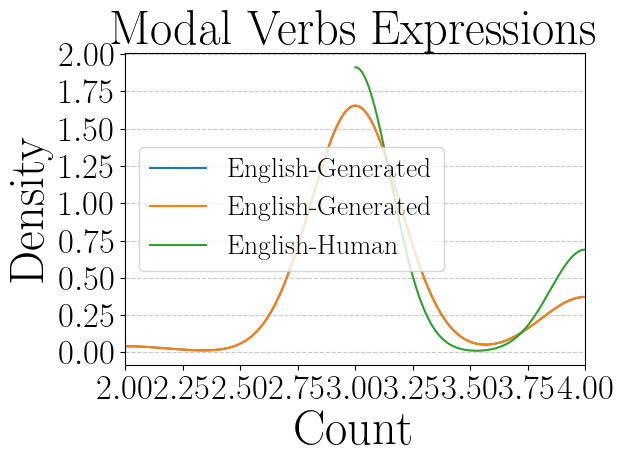

Topic: Modal Verbs Expressions with L2: Urdu
LLM L2 Urdu Gap: 0.12554602966298747
LLM Mono ENG Gap: 0.11531326061108065
LLM Real ENG Gap: 0.00660707886069619
**************************************************


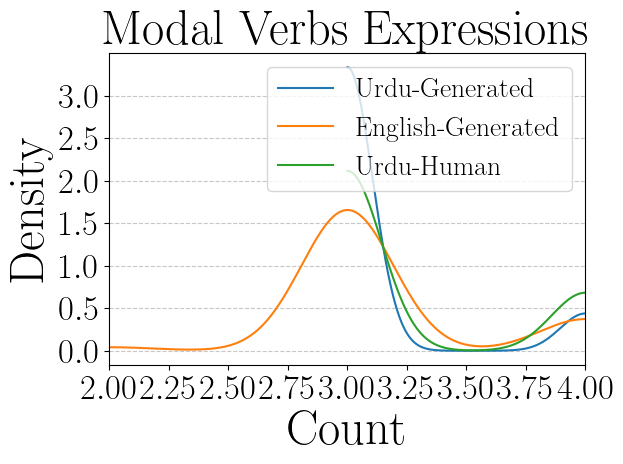

Topic: Noun Verb Collocation with L2: Cantonese
LLM L2 Cantonese Gap: 0.06595817939594956
LLM Mono ENG Gap: 0.029426355856950123
LLM Real ENG Gap: 0.024994807562314807
**************************************************


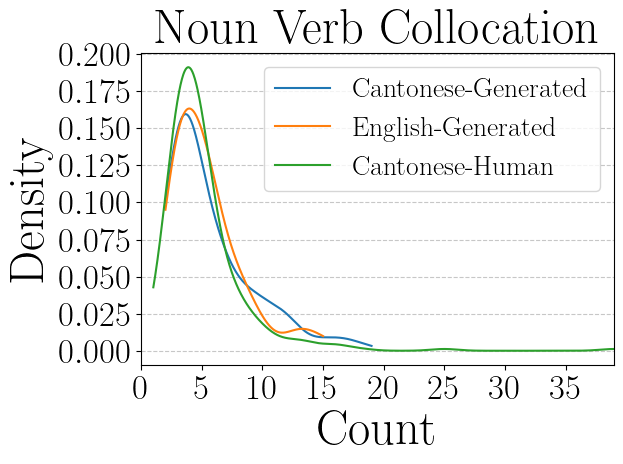

Topic: Noun Verb Collocation with L2: Thai
LLM L2 Thai Gap: 0.12118622701790288
LLM Mono ENG Gap: 0.18956962700679614
LLM Real ENG Gap: 0.11930628540556752
**************************************************


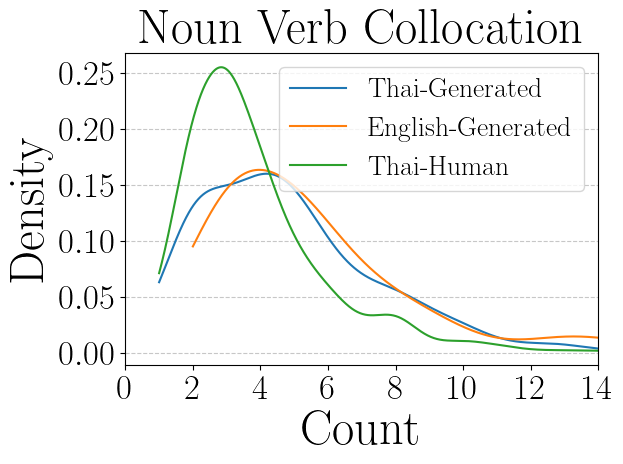

Topic: Noun Verb Collocation with L2: Japanese
LLM L2 Japanese Gap: 0.07284998546644497
LLM Mono ENG Gap: 0.23235565022092497
LLM Real ENG Gap: 0.10791772394784718
**************************************************


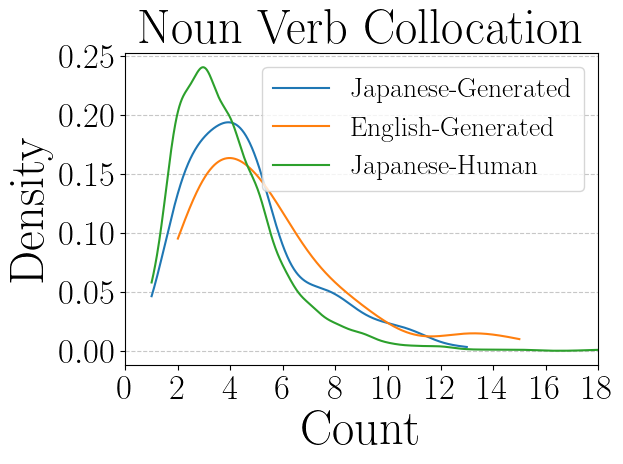

Topic: Noun Verb Collocation with L2: Korean
LLM L2 Korean Gap: 0.18320623792770285
LLM Mono ENG Gap: 0.29536106439262133
LLM Real ENG Gap: 0.10431317481214353
**************************************************


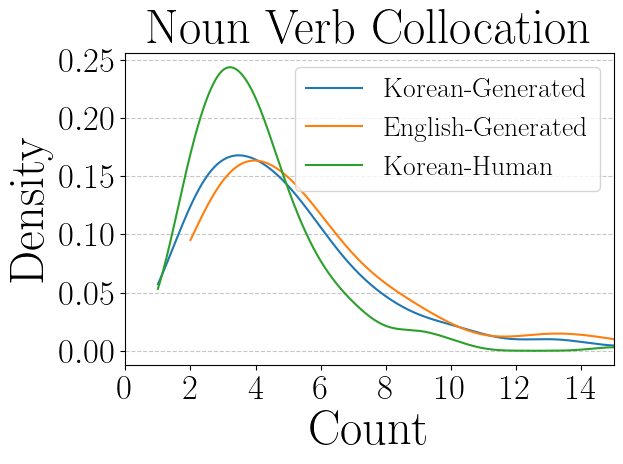

Topic: Noun Verb Collocation with L2: Malay
LLM L2 Malay Gap: 0.0961865258042924
LLM Mono ENG Gap: 0.0797385932131228
LLM Real ENG Gap: 0.04084543756420238
**************************************************


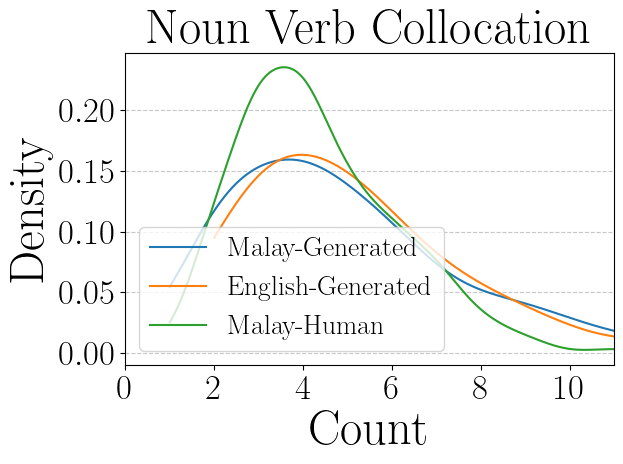

Topic: Noun Verb Collocation with L2: Mandarin
LLM L2 Mandarin Gap: 0.0599391528273467
LLM Mono ENG Gap: 0.10772272391696763
LLM Real ENG Gap: 0.03203344314291484
**************************************************


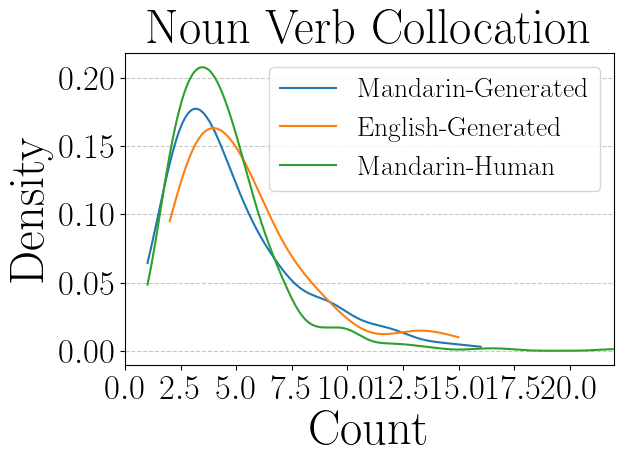

Topic: Noun Verb Collocation with L2: English
LLM L2 English Gap: 0.07852000523205974
LLM Mono ENG Gap: 0.07852000523205974
LLM Real ENG Gap: 0.0
**************************************************


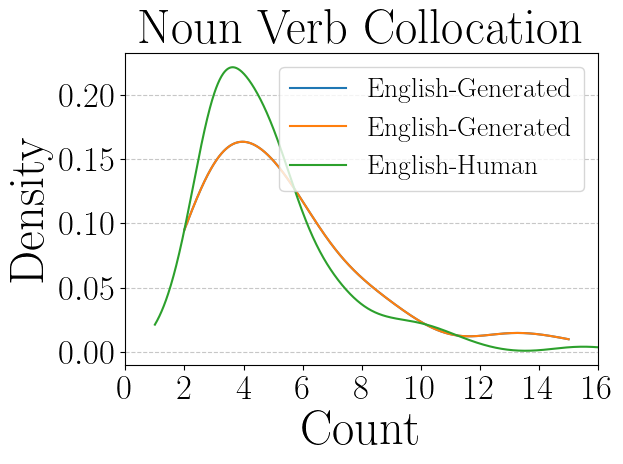

Topic: Noun Verb Collocation with L2: Urdu
LLM L2 Urdu Gap: 0.04401955667169977
LLM Mono ENG Gap: 0.046382092682663606
LLM Real ENG Gap: 0.019086356342857425
**************************************************


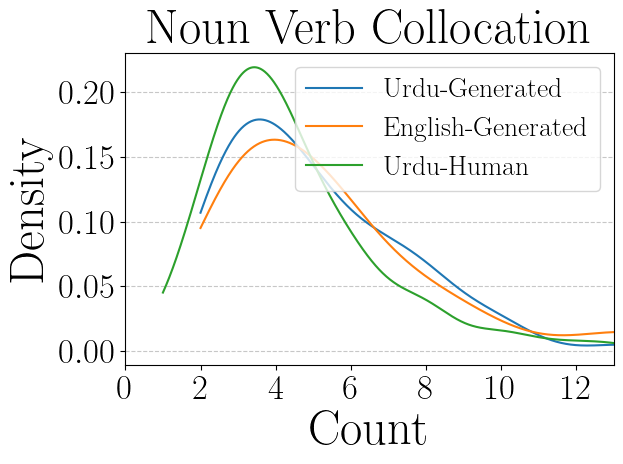

In [15]:
# put the data under /data/{MODEL_NAME}_output
eng_language = 'English'

res_table = pd.DataFrame(
    index=total_language_list,
    columns=pd.MultiIndex.from_product([total_feature_list, 
                                        ['L2_generated_gap', 'Mono_eng_gap']])
)

for topic in total_feature_list:
    feature = revert_mapping[topic]
    pattern = r"([^/]+)_dialog$"
    path = f'../data/{MODEL_NAME}_output/{feature}'

    all_data = pd.DataFrame()
    count = 0
    for root, _, files in os.walk(path):
        if count == 0:
            count += 1
            continue 
        language = re.search(pattern, root).group(1)
        for json_file in files:
            if json_file.endswith('.json'):
                file_path = os.path.join(root, json_file)
                try:
                    data = pd.read_json(file_path)
                    filename = os.path.splitext(json_file)[0]
                    data['source_file'] = filename
                    data['language'] = language
                    all_data = pd.concat([all_data, data], ignore_index=True)
                except ValueError as e:
                    print(f"Error reading {file_path}: {e}")
        count += 1

    all_data['type'] = topic

    real_all_data = pd.DataFrame()
    def parse_filename(filename):
        pattern = r"SD_(\w+)_\d+_.*_(\d+)_([\w+]+)"
        match = re.match(pattern, filename)
        if match:
            language = match.group(1) 
            number = match.group(2)    
            chapter = match.group(3)   
            return language, number, chapter
        return None, None, None

    real_feature = revert_real_mapping[topic]
    real_path =  f'../data/ICNALE_annotations/{real_feature}'
    for root, _, files in os.walk(real_path):
        for json_file in files:
            if json_file.endswith('.json'):
                file_path = os.path.join(root, json_file)
                try:
                    data = pd.read_json(file_path)
                    filename = os.path.splitext(json_file)[0]
                    language, number, chapter = parse_filename(filename)
                    data['source_file'] = filename
                    data['language'] = language
                    data['number'] = number
                    data['chapter'] = chapter
                    real_all_data = pd.concat([real_all_data, data], ignore_index=True)
                except ValueError as e:
                    print(f"Error reading {file_path}: {e}")

    real_all_data['type'] = topic
    real_all_data = real_all_data[real_all_data['language'].isin(real_language_list)]
        
    if feature in [revert_mapping['Reference Word'],
                   revert_mapping['Numbers Agreement'],
                   revert_mapping['Modal Verbs Expressions']]:
        all_data['token_num'] = 1
    else:
        all_data['token_num'] = all_data['annotation_token'].apply(count_elements)

    if real_feature in [revert_real_mapping['Reference Word'],
                        revert_real_mapping['Numbers Agreement'],
                        revert_real_mapping['Modal Verbs Expressions']]:
        real_all_data['token_num'] = 1
    else:
        real_all_data['token_num'] = real_all_data['annotation_token'].apply(count_elements)
        
    real_counts = real_all_data.groupby(['language', 'source_file'])['token_num'].sum().reset_index()
    counts = all_data.groupby(['language', 'source_file'])['token_num'].sum().reset_index()

    for target_language in total_language_list:
        lang_counts = counts[counts['language'] == revert_lan_mapping[target_language]]['token_num']
        eng_lang_counts = counts[counts['language'] == revert_lan_mapping[eng_language]]['token_num']
        real_lang_counts = real_counts[real_counts['language'] == revert_lan_real_mapping[target_language]]['token_num']
        real_lang_ens_counts = real_counts[real_counts['language'] == revert_lan_real_mapping[eng_language]]['token_num']

        generated_l2_density = gaussian_kde(lang_counts)
        real_l2_density = gaussian_kde(real_lang_counts)
        mono_eng_density = gaussian_kde(eng_lang_counts)
        real_eng_density = gaussian_kde(real_lang_ens_counts)
        x_vals = np.linspace(min(real_lang_counts), max(real_lang_counts), 1000)

        l2_generated_gap = kl_divergence(generated_l2_density(x_vals), real_l2_density(x_vals))
        mono_eng_generated_gap = kl_divergence(mono_eng_density(x_vals), real_l2_density(x_vals))
        real_eng_gap = kl_divergence(real_eng_density(x_vals), real_l2_density(x_vals))
        
        print(f"Topic: {topic} with L2: {target_language}")
        print(f"LLM L2 {target_language} Gap: {l2_generated_gap}")
        print(f"LLM Mono ENG Gap: {mono_eng_generated_gap}")
        print(f"LLM Real ENG Gap: {real_eng_gap}")
        print("*" * 50)
        
        res_table.loc[target_language, (topic, 'L2_generated_gap')] = l2_generated_gap
        res_table.loc[target_language, (topic, 'Mono_eng_gap')] = mono_eng_generated_gap
        
        languages = [revert_lan_mapping[target_language], revert_lan_mapping[eng_language]]
        real_languages = [revert_lan_real_mapping[target_language]]

        for language in languages:
            lang_counts = counts[counts['language'] == language]['token_num']
            density = gaussian_kde(lang_counts)
            x_vals = np.linspace(min(lang_counts), max(lang_counts), 1000)
            y_vals = density(x_vals)
            label = language_mapping[language] + "-Generated"
            plt.plot(x_vals, y_vals, label=label)

        for language in real_languages:
            lang_counts = real_counts[real_counts['language'] == language]['token_num']
            density = gaussian_kde(lang_counts)
            x_vals = np.linspace(min(lang_counts), max(lang_counts), 1000)
            y_vals = density(x_vals)
            label = real_language_mapping[language] + "-Human"
            plt.plot(x_vals, y_vals, label=label)
            
        plt.title(f'{topic}', fontsize=35)
        plt.xlabel('Count', fontsize=35)
        plt.ylabel('Density', fontsize=35)
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=25)
        plt.legend(fontsize=20)
        if topic == "Quantifiers Numerals":
            plt.xlim(0, 30)
        else:
            plt.xlim(max(min(lang_counts) - 1, 0), min(max(lang_counts), 50))
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        if not os.path.exists(f"../result/{MODEL_NAME}_output/{target_language}"):
            os.makedirs(f"../result/{MODEL_NAME}_output/{target_language}")
        plt.savefig(f"../result/{MODEL_NAME}_output/{target_language}/" + topic + "_" + target_language + ".pdf")
        #plt.show()
        
res_table.to_csv('../result/{MODEL_NAME}_output/distance_results.csv')

In [ ]:
topic = "Quantifiers Numerals"
feature = revert_mapping[topic]
pattern = r"([^/]+)_dialog$"
path = f'../data/gpt_annotations/{feature}'

all_data = pd.DataFrame()
count = 0
for root, _, files in os.walk(path):
    if count == 0:
        count = count+1
        continue 
    language = re.search(pattern, root).group(1)
    for json_file in files:
        if json_file.endswith('.json'):
            file_path = os.path.join(root, json_file)
            try:
                data = pd.read_json(file_path)
                filename = os.path.splitext(json_file)[0]
                data['source_file'] = filename
                data['language'] = language
                all_data = pd.concat([all_data, data], ignore_index=True)
            except ValueError as e:
                print(f"Error reading {file_path}: {e}")
    count = count + 1
    
real_all_data = pd.DataFrame()
def parse_filename(filename):
    pattern = r"SD_(\w+)_\d+_.*_(\d+)_([\w+]+)"
    match = re.match(pattern, filename)
    if match:
        language = match.group(1) 
        number = match.group(2)    
        chapter = match.group(3)   
        return language, number, chapter
    return None, None, None

real_feature = revert_real_mapping[topic]
real_path =  f'../data/ICNALE_annotations/{real_feature}'
for root, _, files in os.walk(real_path):
    for json_file in files:
        if json_file.endswith('.json'):
            file_path = os.path.join(root, json_file)
            try:
                data = pd.read_json(file_path)
                filename = os.path.splitext(json_file)[0]
                language, number, chapter = parse_filename(filename)
                data['source_file'] = filename
                data['language'] = language
                data['number'] = number
                data['chapter'] = chapter
                real_all_data = pd.concat([real_all_data, data], ignore_index=True)
            except ValueError as e:
                print(f"Error reading {file_path}: {e}")

if topic == "Modal Verbs Expressions":   
    real_all_data['type'] = 'modal_verb_annotation'
real_all_data =  real_all_data[real_all_data['language'].isin(real_language_list)]
    
if feature in [revert_mapping['Reference Word'],
            revert_mapping['Numbers Agreement'],
            revert_mapping['Modal Verbs Expressions'],
            revert_mapping['Noun Verb Collocation']
]:
    all_data['token_num'] = 1
else:
    all_data['token_num'] = all_data['annotation_token'].apply(count_elements)

if real_feature in [revert_real_mapping['Reference Word'],
            revert_real_mapping['Numbers Agreement'],
            revert_real_mapping['Modal Verbs Expressions'],
            revert_real_mapping['Noun Verb Collocation']]:
    real_all_data['token_num'] = 1
else:
    real_all_data['token_num'] = real_all_data['annotation_token'].apply(count_elements)
    
real_counts = real_all_data.groupby(['language', 'source_file'])['token_num'].sum().reset_index()
counts = all_data.groupby(['language', 'source_file'])['token_num'].sum().reset_index()


languages = [revert_lan_mapping['THA'], revert_lan_mapping['ENG']]
real_languages = [revert_lan_real_mapping['THA'], revert_lan_real_mapping['ENG']]

for language in languages:
    lang_counts = counts[counts['language'] == language]['token_num']
    density = gaussian_kde(lang_counts)
    x_vals = np.linspace(min(lang_counts), max(lang_counts), 1000)
    y_vals = density(x_vals)
    plt.plot(x_vals, y_vals, label=language)
    
plt.title(f'Density Estimation for {topic} by Language')
plt.xlabel('Count')
plt.ylabel('Density')
plt.legend(title="Language")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.show()


for language in real_languages:
    lang_counts = real_counts[real_counts['language'] == language]['token_num']
    density = gaussian_kde(lang_counts)
    x_vals = np.linspace(min(lang_counts), max(lang_counts), 1000)
    y_vals = density(x_vals)
    plt.plot(x_vals, y_vals, label=language)
    
plt.title(f'Density Estimation for {topic} by Real Language')
plt.xlabel('Count')
plt.ylabel('Density')
plt.legend(title="Language")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

KeyError: 'THA'